In [3]:
## Libraries

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt



To draw some Bernoulli samples, we will use the `bernoulli.rvs` function in `scipy.stats`. The `stats` package contains many functions pertaining to different probability distribution families. The `rvs` function specifically draws a <b>Random Sample of fixed Size</b>. We will draw some samples and plot accordingly

In [20]:
p = 0.5
size = 1000
sample = stats.bernoulli.rvs(p, size=size)

print(sample[:20])
print(f"Number of successes = {sum(sample)} of {size} trials")
print(f"Mean = {np.mean(sample):.3}, Variance = {np.var(sample,ddof=1):.4}")


[0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1]
Number of successes = 493 of 1000 trials
Mean = 0.493, Variance = 0.2502


In [19]:
p = 0.1
size = 1000
sample = stats.bernoulli.rvs(p, size=size)

print(sample[:20])
print(f"Number of successes = {sum(sample)} of {size} trials")
print(f"Mean = {np.mean(sample):.3}, Variance = {np.var(sample,ddof=1):.4}")


[0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
Number of successes = 103 of 1000 trials
Mean = 0.103, Variance = 0.09248


Text(0, 0.5, 'Variance ($p(1-p)$)')

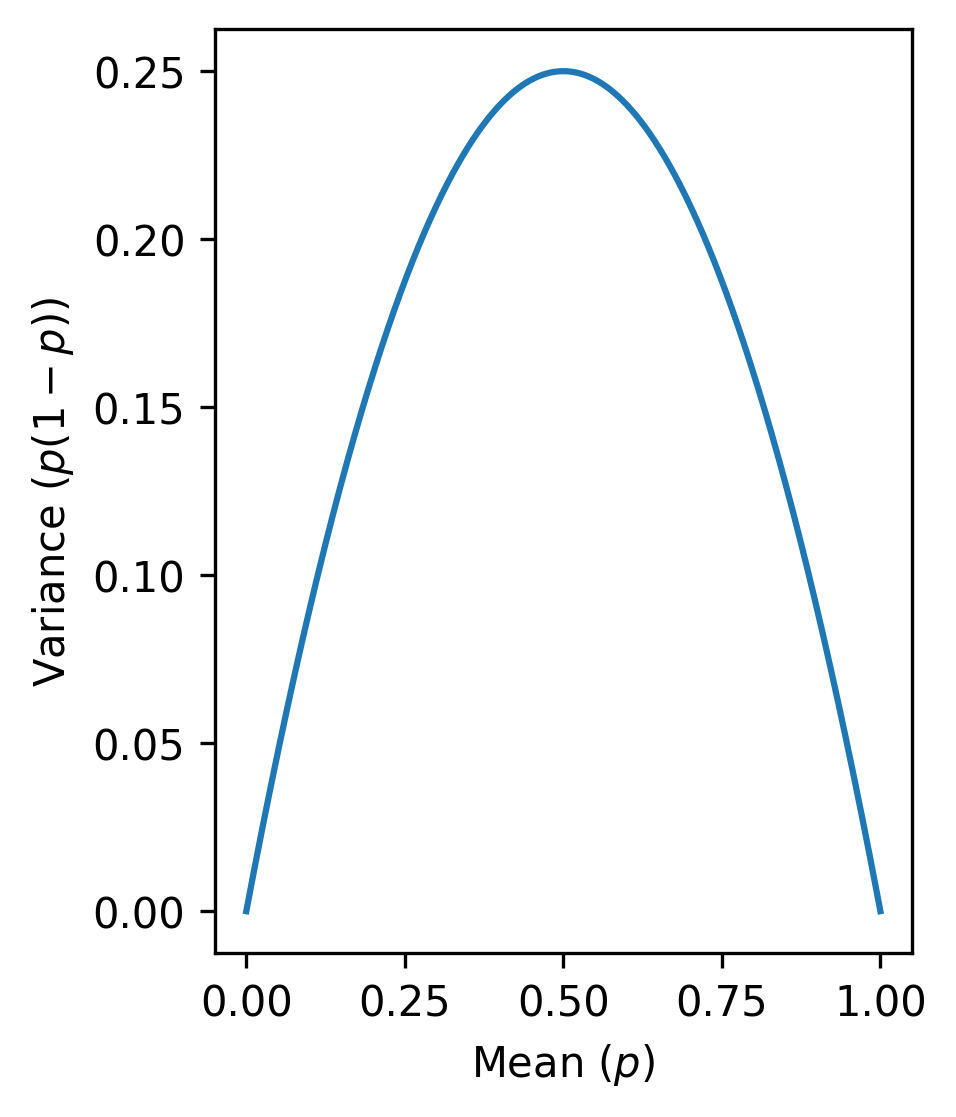

In [30]:
## Plot mean vs variance per p
p = np.linspace(0,1,1000)
mean = p
var = p*(1-p)
fig, ax = plt.subplots(figsize=(3,4), dpi=300)
ax.plot(mean, var)
ax.set_xlabel(f"Mean ($p$)")
ax.set_ylabel(f"Variance ($p(1-p)$)")


Text(0, 0.5, 'k')

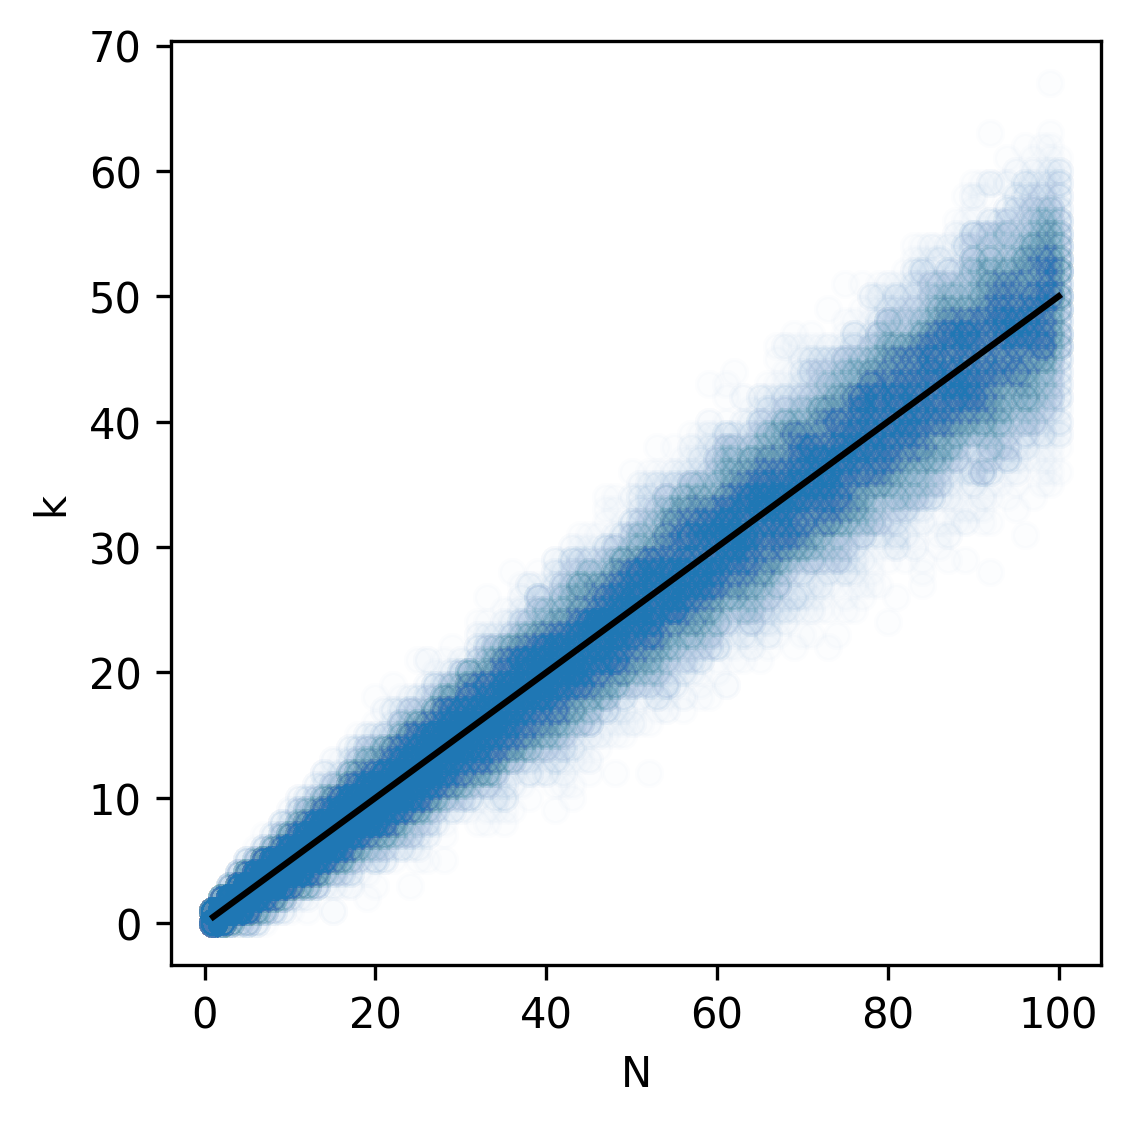

In [25]:
## Increasingly sample N and plot the observed means

p = 0.5
N_range = np.arange(1,101)
trials = 200
alpha = 0.01

obs_N = []
obs_sample = []
for N in N_range:
    for _ in range(trials):
        obs_N.append(N)
        sample = stats.binom.rvs(N, p)
        obs_sample.append(sample)


fig, ax = plt.subplots(figsize=(4,4), dpi=300)
ax.scatter(obs_N, obs_sample, alpha=alpha)
ax.plot(N_range, N_range*p, c='black')

ax.set_xlabel('N')
ax.set_ylabel('k')



46

In [28]:
import math

def sterling(n):
    return n*math.log(n) - n

list_of_n = [10, 50, 100, 500, 1000]

print(f"{'n':>5s},{'ln(n!)':>10s},{'Sterling':>10s},{'%_error':>10s}")
for n in list_of_n:
    ln_fact = math.log(math.factorial(n))
    approx = sterling(n)
    error = abs(100 * (approx-ln_fact)/ln_fact)
    print(f"{n:5d},{ln_fact:10.2f},{approx:10.2f},{error:8.2f}%")


    n,    ln(n!),  Sterling,   %_error
   10,     15.10,     13.03,   13.76%
   50,    148.48,    145.60,    1.94%
  100,    363.74,    360.52,    0.89%
  500,   2611.33,   2607.30,    0.15%
 1000,   5912.13,   5907.76,    0.07%


Text(0, 0.5, 'P(x)')

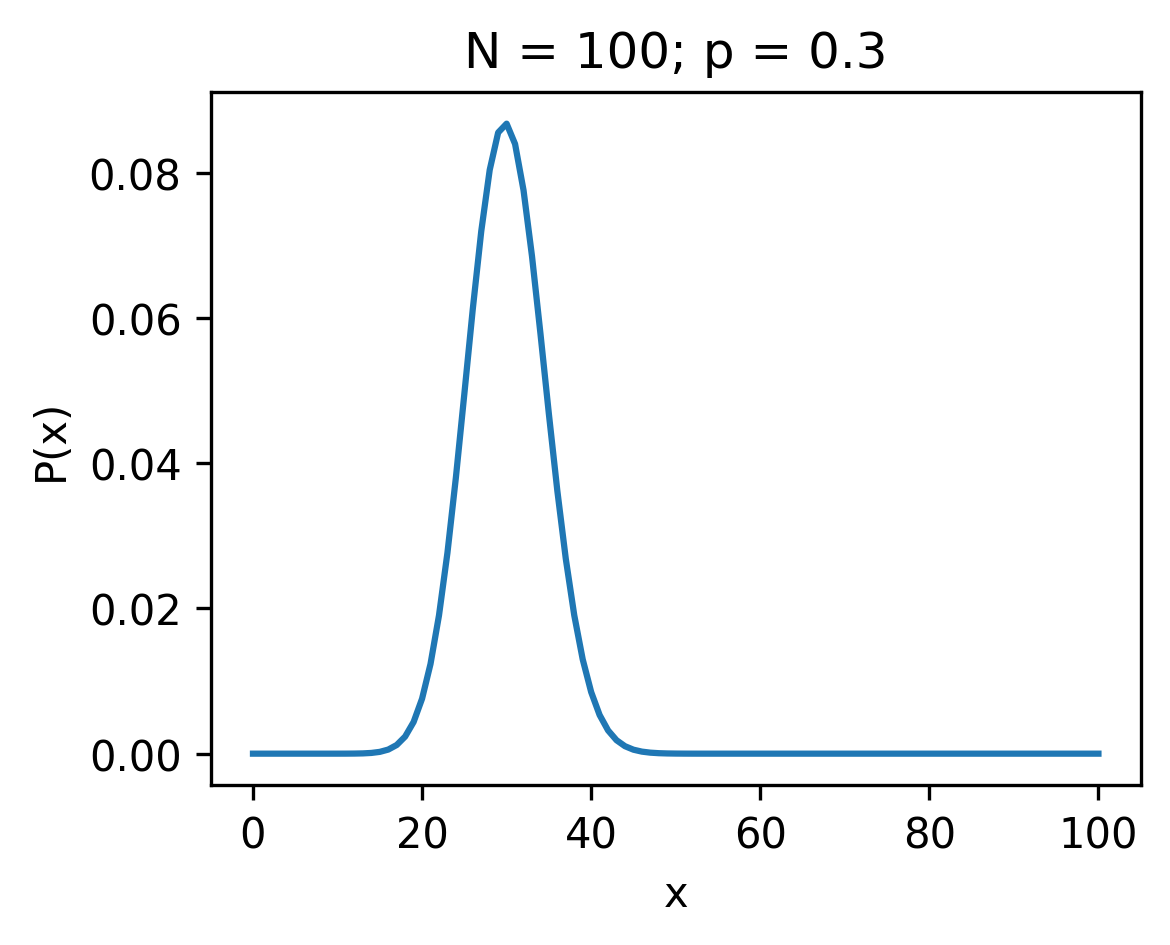

In [30]:
# Plot binomial pdf

N = 100
p = 0.3
x = np.arange(0,101)

p_x = stats.binom.pmf(x,N,p)

fig, ax = plt.subplots(figsize=(4,3), dpi=300)

ax.plot(x, p_x)

ax.set_title('N = 100; p = 0.3')
ax.set_xlabel('x')
ax.set_ylabel('P(x)')
